<h1>Import libraries<h1>

In [1]:
import pandas as pd
import numpy as np
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

<h2>Reading CSV File & drop duplicates<h2>

In [3]:
# Read the data
apps_with_duplicates = pd.read_csv('apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
total_apps = apps.shape[0]
print(f"Total number of unique apps in the dataset: {total_apps}\n")

# Have a look at a random sample of 5 rows
print("Random sample of 5 rows:")
print(apps.sample(5).to_string(index=False))

Total number of unique apps in the dataset: 9659

Random sample of 5 rows:
 Unnamed: 0                            App        Category  Rating  Reviews  Size    Installs Type Price Content Rating          Genres    Last Updated Current Ver  Android Ver
      10123 EZ Video Download for Facebook          SOCIAL     4.1    34079   1.3  1,000,000+ Free     0           Teen          Social  March 14, 2017       2.001 4.0.3 and up
       3417       Petals 3D live wallpaper PERSONALIZATION     4.2   112479   4.3 10,000,000+ Free     0       Everyone Personalization   July 25, 2018       3.0.5   4.2 and up
       7691                 CP Connect 2.0    PRODUCTIVITY     NaN        0   5.8        500+ Free     0       Everyone    Productivity August 17, 2017       3.9.4 4.0.3 and up
       1492     Apartment Decorating Ideas  HOUSE_AND_HOME     3.9     1478   5.7    100,000+ Free     0       Everyone    House & Home  March 13, 2015         1.2   3.0 and up
      10816             FieldBi FR Offli

<h2>Data cleaning<h2>

In [4]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs' , 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char,''))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


<h2>Correcting data types<h2>

In [5]:
# Convert Installs to float data type
apps['Installs'] = apps[col].astype(float)

# Convert Price to float data type
apps['Price'] = apps[col].astype(float)

# Checking dtypes of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB
None


<h2>Exploring app categories<h2>

Number of categories =  33


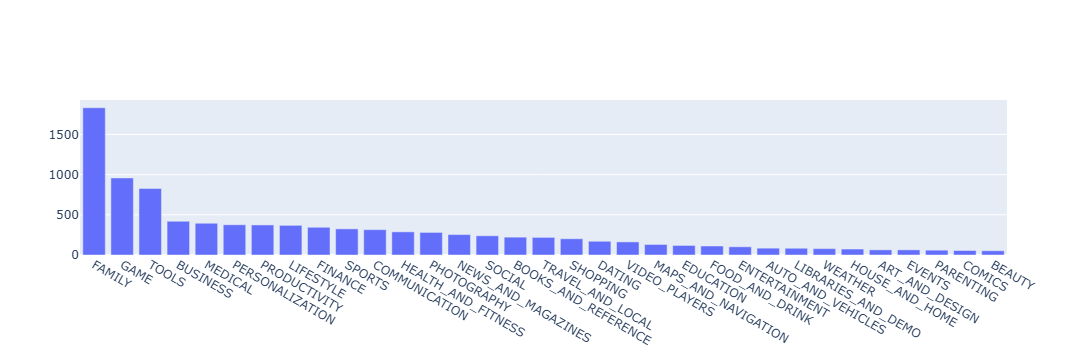

In [6]:
# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)
# Number of categories =  33

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts()
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

<h2>Distribution of app ratings<h2>

Average app rating =  4.173243045387994


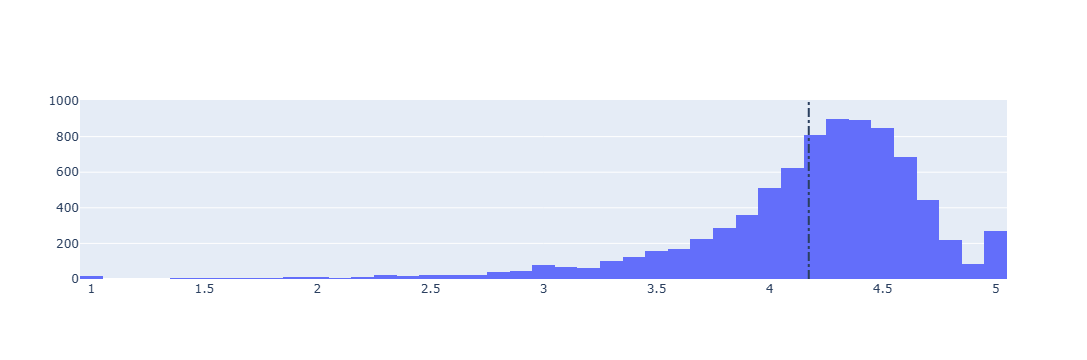

In [7]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

<h2>Size and price of an app<h2>

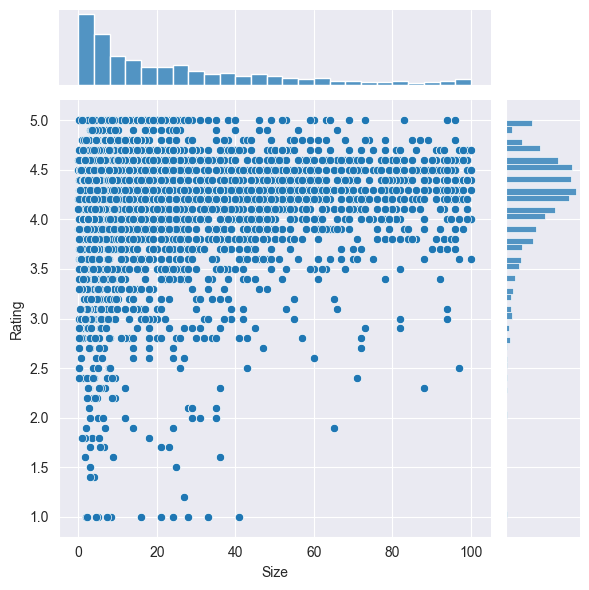

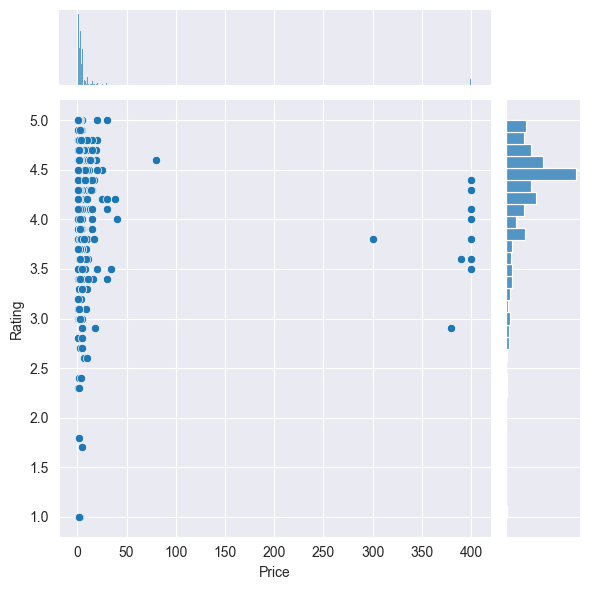

In [8]:
# Select rows where both 'Rating' and 'Size' values are not null
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

<h2>Relation between category and app price<h2>

<h1>NOTE!<h1>
<p><h3>There have indeed been real "I'm Rich" apps in the past,
but they were often pranks or novelty items. Many have been removed from Google app store.<h3></p>

<h3>That will appear in follwing cell output<h3>

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


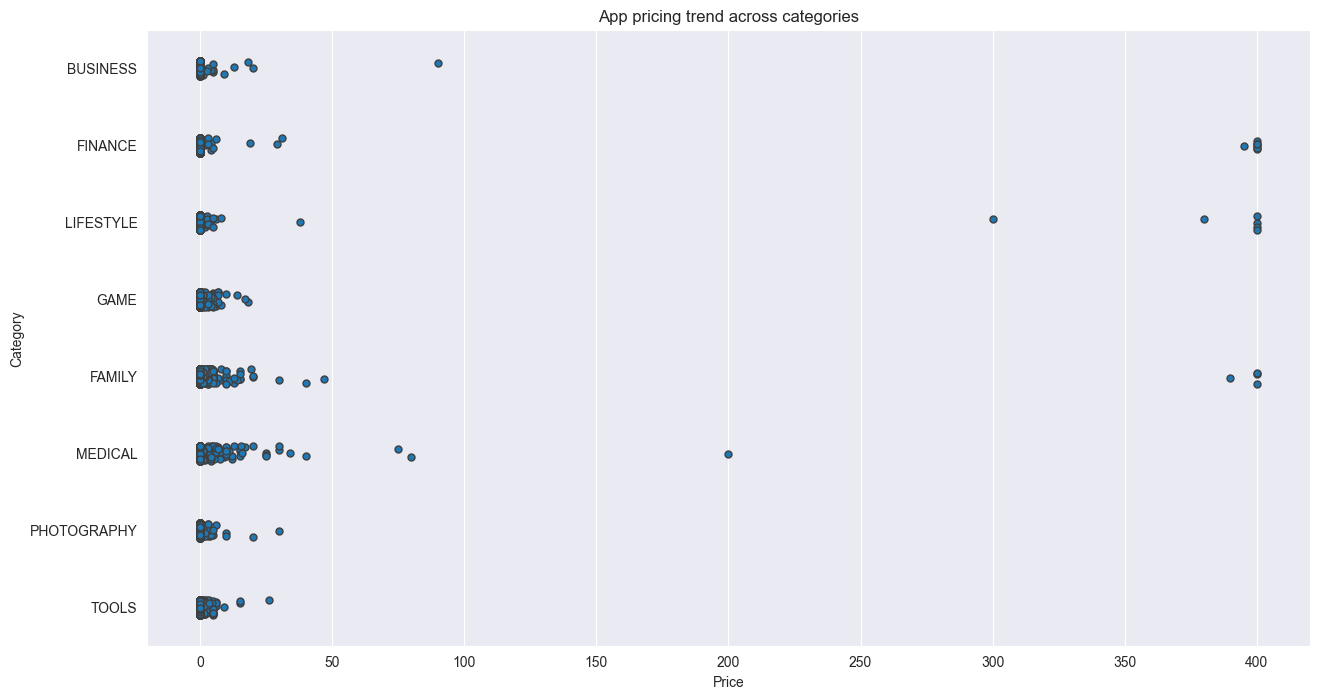

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats["Price"] > 200]
apps_above_200

<h2>Filter out "junk" apps<h2>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

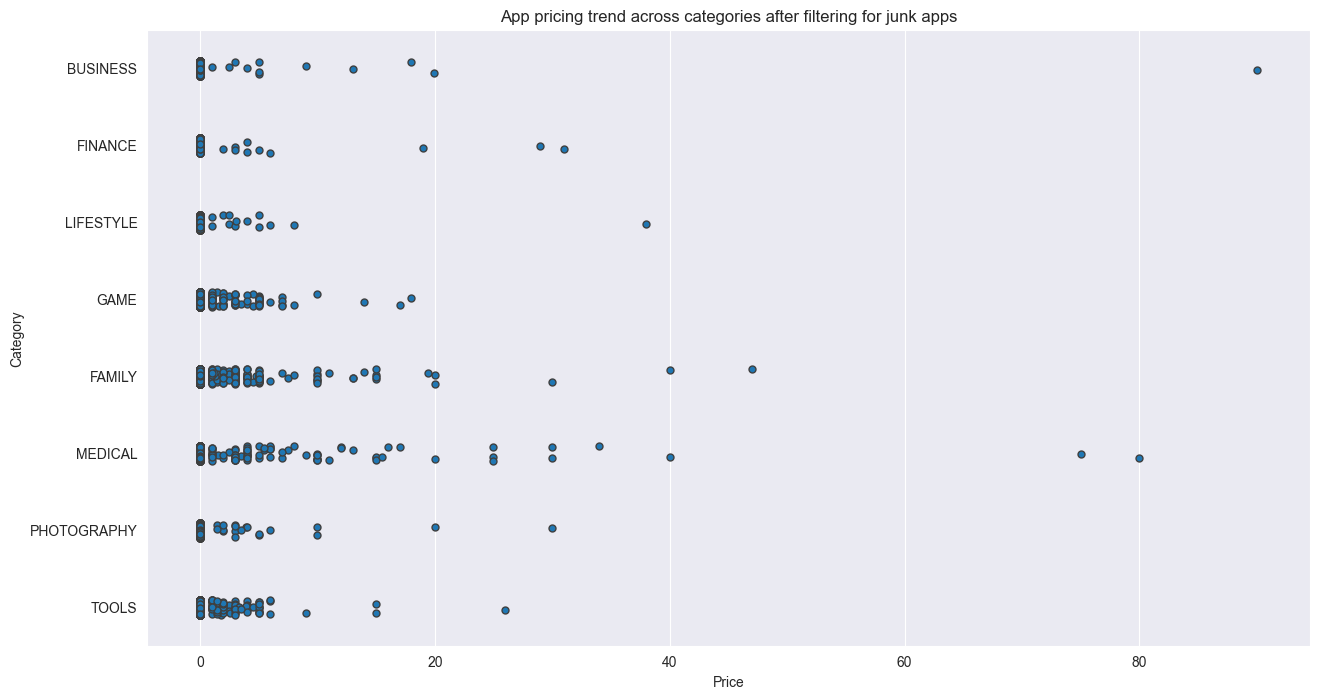

In [10]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"]<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category
ax = sns.stripplot(x=apps_under_100["Price"], y=apps_under_100["Category"], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

<h2>Popularity of paid apps vs free apps<h2>

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
apps['Scaled_Installs'] = scaler.fit_transform(apps[['Installs']])


In [12]:
apps.loc[apps['Type'] == 'Free', 'Installs'] += np.random.uniform(0.1, 1, len(apps[apps['Type'] == 'Free']))

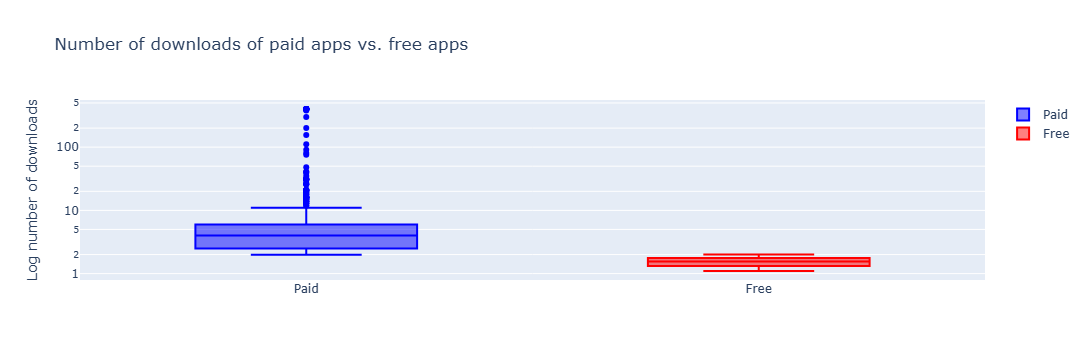

In [13]:
# Replace zero installs with 1 for log transformation
apps['Installs'] = apps['Installs'].replace(0, 1)
apps['Installs'] = apps['Installs'] + 1  # Shift data slightly to avoid clustering around 0

# Ensure 'Installs' column is numeric
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

# Handle missing values
apps = apps.dropna(subset=['Installs'])

# Create traces for the box plot
trace0 = go.Box(
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name='Paid',
    marker=dict(color='blue')
)

trace1 = go.Box(
    y=apps[apps['Type'] == 'Free']['Installs'],
    name='Free',
    marker=dict(color='red')
)

# Define the layout
layout = go.Layout(
    title="Number of downloads of paid apps vs. free apps",
    yaxis=dict(
        title="Log number of downloads",
        type='log',
        autorange=True
    )
)

data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})


<h2>Sentiment analysis of user reviews<h2>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

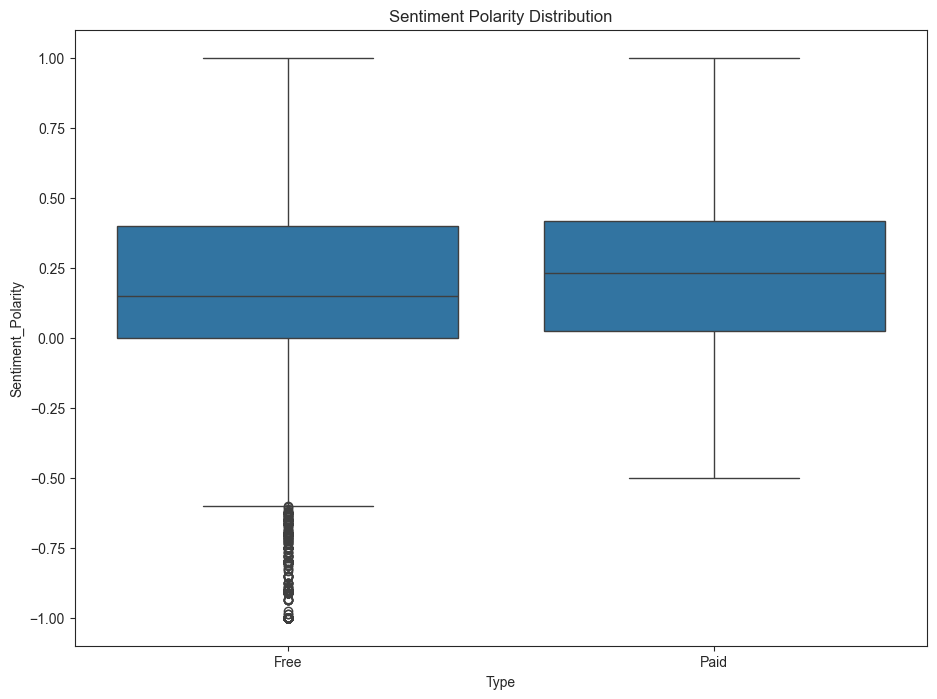

In [14]:
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Join the two dataframes
merged_df = pd.merge(apps,reviews_df,on='App',how='inner')

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')